<a href="https://colab.research.google.com/github/Jane-Ngala/Core-Module-2-Week-2/blob/main/Core_Module_2_Week_2_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

## 1.Defining the Question

### a) Specifying the Data Analytic Question

- Study the factors affecting housing prices,then create a model that would allow the company to accurately predict the sale of prices 

###  b) Defining the Metric for Success

### c) Understanding the context 

- The model will be considered a success when it is able to correctly and accurately predict the housing prices.

### d) Recording the Experimental Design

1. Perform EDA
2. Perform Feature Engineering if necessary
3. Check for multicoliinearity
4. Build the model
5. Perform cross validation
6. Calculate the RMSE
7. Create the residual plots and assess for heteroskedicity

### e) Data Relevance

- The data to be used is from a reliable source

## 2.Reading the Data

In [1]:
# Loading Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import statsmodels.regression.quantile_regression as quant
from sklearn.linear_model import ElasticNet
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Loading and reading the dataset

url = 'http://bit.ly/IndependentProjectWeek7Dataset'
rentals = pd.read_csv(url)
rentals.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# Previewing bottom of data

rentals.tail()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [4]:
# Previwing the columns

rentals.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
# Checking for duplicates

rentals.duplicated().sum()

3

In [6]:
# Investigating the duplicates

rentals_dupicates = rentals[rentals.duplicated()]
rentals_dupicates

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3951,1825069031,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789
14983,6308000010,585000.0,3,2.50,2290,5089,2.0,0,0,3,9,2290,0,2001,0,98006,47.5443,-122.172,2290,7984
20054,8648900110,555000.0,3,2.50,1940,3211,2.0,0,0,3,8,1940,0,2009,0,98027,47.5644,-122.093,1880,3078


- Do not remove duplicates, the entries are clearly different

In [7]:
# Previeving the number of records

rentals.shape

(21613, 20)

In [8]:
# Previewing datatype of the columns
rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

## 3.Tidying the Dataset

In [9]:
# Converting year renovated and year built to datetime datatype

rentals['yr_built'] = pd.to_datetime(rentals['yr_built'])
rentals['yr_renovated'] = pd.to_datetime(rentals['yr_renovated'])


In [10]:
# Converting bathrooms and floors from float to int 

rentals['bathrooms'] = rentals['bathrooms'].astype(int)
rentals['floors'] = rentals['floors'].astype(int)

In [11]:
# Dropping unnecessary columns

def dropping_columns(data,cols):
  data.drop(cols, axis = 1, inplace = True)

  return data


cols = ['id','yr_built', 'grade', 'yr_renovated', 'waterfront', 'view', 'condition', 'sqft_living15', 'sqft_basement', 'sqft_lot15', 'lat', 'long']
rentals = dropping_columns(rentals,cols)
rentals

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,zipcode
0,221900.0,3,1,1180,5650,1,1180,98178
1,538000.0,3,2,2570,7242,2,2170,98125
2,180000.0,2,1,770,10000,1,770,98028
3,604000.0,4,3,1960,5000,1,1050,98136
4,510000.0,3,2,1680,8080,1,1680,98074
...,...,...,...,...,...,...,...,...
21608,360000.0,3,2,1530,1131,3,1530,98103
21609,400000.0,4,2,2310,5813,2,2310,98146
21610,402101.0,2,0,1020,1350,2,1020,98144
21611,400000.0,3,2,1600,2388,2,1600,98027


In [12]:
# converting zipcode to string datatype
rentals['zipcode'] = rentals['zipcode'].astype(str)

In [13]:
rentals.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'zipcode'],
      dtype='object')

In [14]:
rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   bedrooms     21613 non-null  int64  
 2   bathrooms    21613 non-null  int64  
 3   sqft_living  21613 non-null  int64  
 4   sqft_lot     21613 non-null  int64  
 5   floors       21613 non-null  int64  
 6   sqft_above   21613 non-null  int64  
 7   zipcode      21613 non-null  object 
dtypes: float64(1), int64(6), object(1)
memory usage: 1.3+ MB


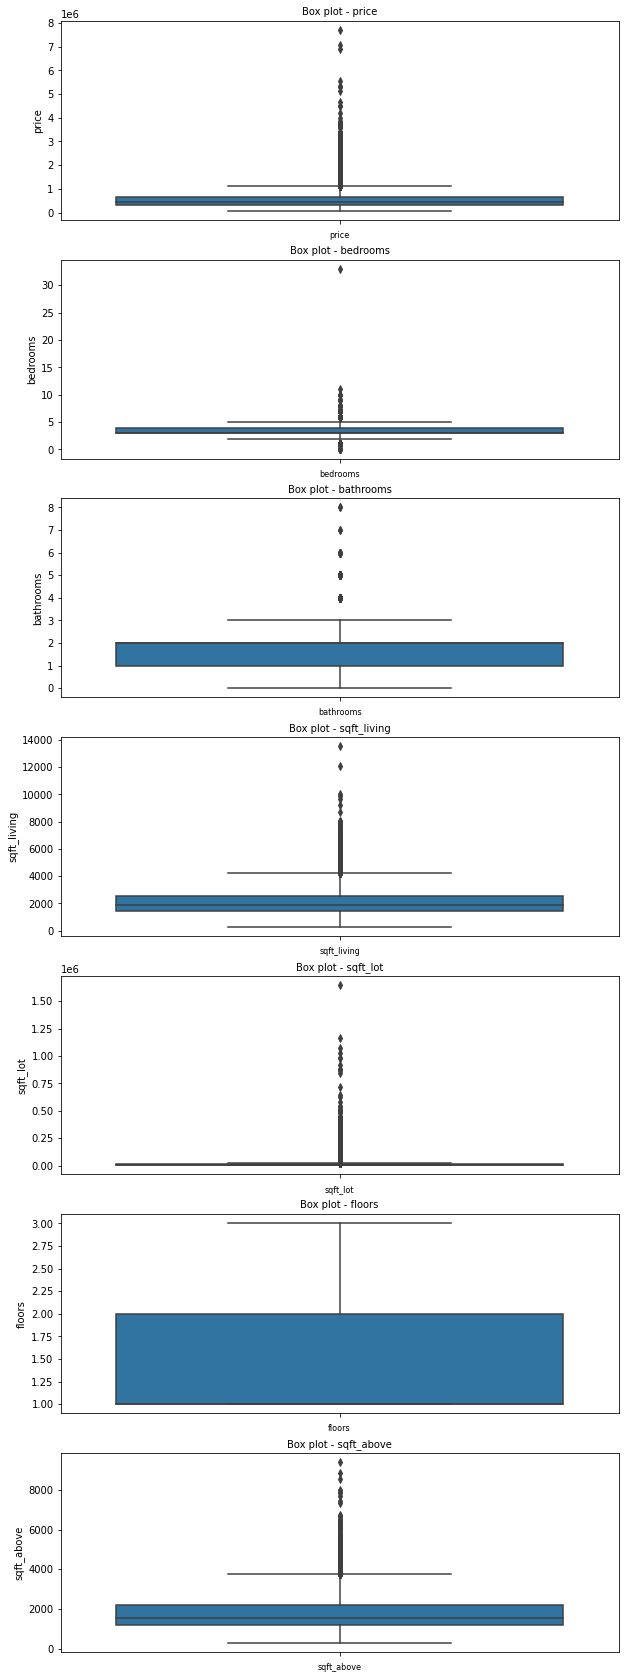

In [15]:
# Checking for any outliers

col_names = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above']

fig, ax = plt.subplots(len(col_names), figsize= (10,30))

for i, col_val in enumerate(col_names):
  sns.boxplot(y = rentals[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()


In [16]:
# Removing outliers using IQR method
# ---
# Define the outliers range 
Q3 = rentals[col_names].quantile(0.75)
Q1 = rentals[col_names].quantile(0.25)
IQR = Q3 - Q1

# Determine the outliers
outliers = rentals[col_names][((rentals[col_names] < (Q1 - 1.5 * IQR))
 |(rentals[col_names] > (Q3 + 1.5 * IQR))).any(axis=1)]
j = outliers.shape

# Outliers Percentage
percentage_of_outliers = (len(outliers)/len(rentals))*100

# The total number of outliers
print(f"The total number of outliers are {j}. Which translates to {percentage_of_outliers}% of the data.")

The total number of outliers are (3960, 7). Which translates to 18.322306019525286% of the data.


## 4.EDA

In [17]:
# Previewing the statistical summary

rentals.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000
mean,5.401822e+05,3.370842,1.749734,2079.899736,1.510697e+04,1.446213,1788.390691
std,3.673622e+05,0.930062,0.734873,918.440897,4.142051e+04,0.551894,828.090978
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,290.000000
25%,3.219500e+05,3.000000,1.000000,1427.000000,5.040000e+03,1.000000,1190.000000
50%,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.000000,1560.000000
75%,6.450000e+05,4.000000,2.000000,2550.000000,1.068800e+04,2.000000,2210.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,9410.000000


In [18]:
# Computing the mode

rentals.mode()
mode_df = pd.DataFrame(rentals.mode())
mode_df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,zipcode
0,350000.0,3.0,2.0,1300.0,5000.0,1.0,1300.0,98103


- Most houses have 3 bedrooms
- Most houses have 2 bathrooms
- Most houses have 1 floor

In [19]:
# Creating a frequency table from bedrooms column

print(rentals['bedrooms'].value_counts())

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fba25073c50>],
      dtype=object)

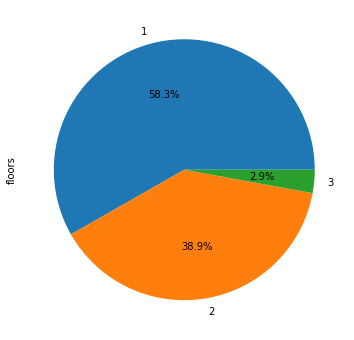

In [20]:
# Grouping the houses on floor basis

rentals.floors.value_counts().plot(kind = 'pie', autopct = '%0.1f%%', figsize = [8, 6],
                                       subplots = True)

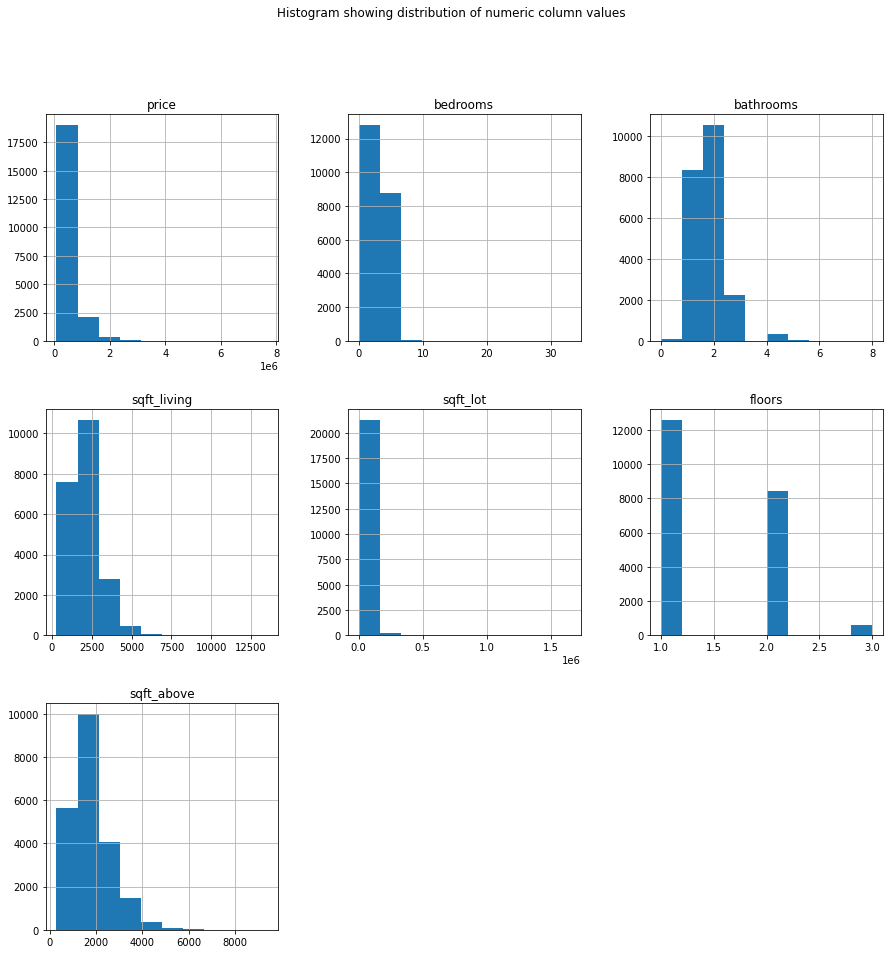

In [21]:
# Visualizing using histogram

rentals.hist(bins=10, figsize=(15,15))
plt.suptitle("Histogram showing distribution of numeric column values")
plt.savefig('Histogram')
plt.show()

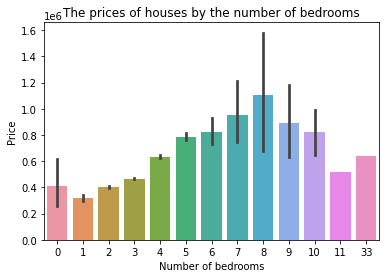

In [22]:
# Visualizing relationship between number of bedrooms and price

sns.barplot(x = rentals['bedrooms'], y = rentals['price'])
plt.xlabel('Number of bedrooms')
plt.ylabel('Price')
plt.title('The prices of houses by the number of bedrooms')
plt.show()

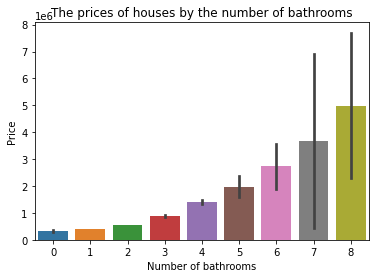

In [23]:
# Visualizing relationship between number of bathrooms and price

sns.barplot(x = rentals['bathrooms'], y = rentals['price'])
plt.xlabel('Number of bathrooms')
plt.ylabel('Price')
plt.title('The prices of houses by the number of bathrooms')
plt.show()

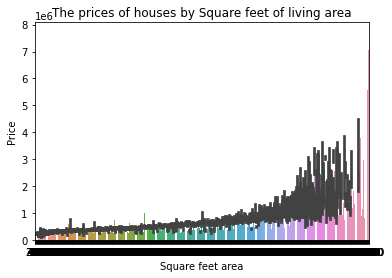

In [24]:
# Visualizing relationship Square feet area of living area and price


sns.barplot(x = rentals['sqft_living'], y = rentals['price'])
plt.xlabel('Square feet area')
plt.ylabel('Price')
plt.title('The prices of houses by Square feet of living area')
plt.show()

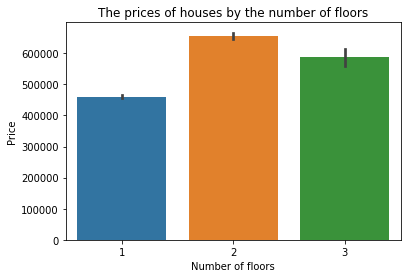

In [25]:
# Visualizing relationship between number of floors and price

sns.barplot(x = rentals['floors'], y = rentals['price'])
plt.xlabel('Number of floors')
plt.ylabel('Price')
plt.title('The prices of houses by the number of floors')
plt.show()

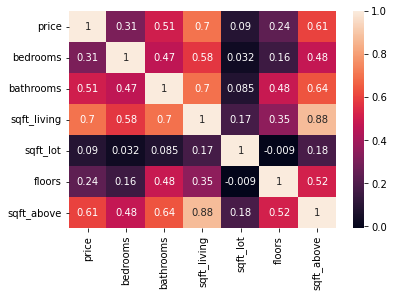

In [26]:
# Plotting correlation on a heatmap

sns.heatmap(rentals.corr(),annot=True)
plt.show()

## 5.Regression Analysis

### (i) Multiple Linear Regression

In [27]:
rentals.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'zipcode'],
      dtype='object')

In [28]:
# Determining the dependent and Independent variables

X = rentals[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'zipcode']]
y = rentals.price
print('the X array is: ',X)
print('the X array is: ',y)

the X array is:         bedrooms  bathrooms  sqft_living  sqft_lot  floors  sqft_above zipcode
0             3          1         1180      5650       1        1180   98178
1             3          2         2570      7242       2        2170   98125
2             2          1          770     10000       1         770   98028
3             4          3         1960      5000       1        1050   98136
4             3          2         1680      8080       1        1680   98074
...         ...        ...          ...       ...     ...         ...     ...
21608         3          2         1530      1131       3        1530   98103
21609         4          2         2310      5813       2        2310   98146
21610         2          0         1020      1350       2        1020   98144
21611         3          2         1600      2388       2        1600   98027
21612         2          0         1020      1076       2        1020   98144

[21613 rows x 7 columns]
the X array is:  0   

In [29]:
# Computing the Intercept and coefficients

regressor = LinearRegression()
regressor.fit(X,y)
print(regressor.intercept_)
print(regressor.coef_)

-54945553.54378085
[-6.09910063e+04  3.99256341e+04  3.07882799e+02 -3.18103316e-01
 -2.93052811e+04  1.85465608e+00  5.61033120e+02]


In [30]:
# Displaying the correlation coefficients

corr = rentals.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above
price,1.000000,0.308338,0.510082,0.702044,0.089655,0.237207,0.605566
bedrooms,0.308338,1.000000,0.467452,0.576671,0.031703,0.155643,0.477600
bathrooms,0.510082,0.467452,1.000000,0.697875,0.085310,0.484822,0.639933
sqft_living,0.702044,0.576671,0.697875,1.000000,0.172826,0.353321,0.876597
sqft_lot,0.089655,0.031703,0.085310,0.172826,1.000000,-0.008951,0.183512
floors,0.237207,0.155643,0.484822,0.353321,-0.008951,1.000000,0.517913
sqft_above,0.605566,0.477600,0.639933,0.876597,0.183512,0.517913,1.000000


In [31]:
# Computing VIF score

pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above
price,2.048962,0.328625,-0.155646,-1.617769,0.087765,0.077690,0.063659
bedrooms,0.328625,1.600959,-0.286453,-1.102401,0.121388,0.160591,0.080601
bathrooms,-0.155646,-0.286453,2.310407,-1.370675,-0.004362,-0.725665,0.330718
sqft_living,-1.617769,-1.102401,-1.370675,7.516413,-0.131208,0.995702,-4.697158
sqft_lot,0.087765,0.121388,-0.004362,-0.131208,1.062334,0.158214,-0.270207
floors,0.077690,0.160591,-0.725665,0.995702,0.158214,1.706388,-1.444992
sqft_above,0.063659,0.080601,0.330718,-4.697158,-0.270207,-1.444992,5.626798


- VIF < 10, proceed to creating model

In [32]:
# Creating model

X = rentals.drop(['price'],axis=1)
y = rentals.price
print('the X array is: ',X)
print('the X array is: ',y)

the X array is:         bedrooms  bathrooms  sqft_living  sqft_lot  floors  sqft_above zipcode
0             3          1         1180      5650       1        1180   98178
1             3          2         2570      7242       2        2170   98125
2             2          1          770     10000       1         770   98028
3             4          3         1960      5000       1        1050   98136
4             3          2         1680      8080       1        1680   98074
...         ...        ...          ...       ...     ...         ...     ...
21608         3          2         1530      1131       3        1530   98103
21609         4          2         2310      5813       2        2310   98146
21610         2          0         1020      1350       2        1020   98144
21611         3          2         1600      2388       2        1600   98027
21612         2          0         1020      1076       2        1020   98144

[21613 rows x 7 columns]
the X array is:  0   

In [33]:
#Splitting the train and test values in our dataset

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

#Fitting the data in a linear regression

regressor = LinearRegression()
regressor.fit(X_train,y_train)

# Feature scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
# Prediction based on our model
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df


# # Create the residuals 

residuals = np.subtract(y_pred, y_test)

# Previewing the residuals:
pd.DataFrame(residuals)


,price
17384,-6.019940e+07
722,-6.145291e+07
2680,-6.042044e+07
18754,-6.043634e+07
14554,-6.070528e+07
...,...
5427,-6.071689e+07
16547,-6.020458e+07
4585,-6.023386e+07
17762,-6.016810e+07


In [35]:
# Evaluating the Algorithm
# 

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 60403070.86737552
Mean Squared Error: 3648654371674253.5
Root Mean Squared Error: 60404092.34211084


- RMSE = 60404092.34211084, is extremely high,multiple linear regression model is not suitable for our prediction.

### (ii)Quantile Regression

In [36]:
# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('price ~ bedrooms', rentals)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:              0.04634
Model:                       QuantReg   Bandwidth:                   4.011e+04
Method:                 Least Squares   Sparsity:                    5.565e+05
Date:                Mon, 25 Apr 2022   No. Observations:                21613
Time:                        01:40:27   Df Residuals:                    21611
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     1.8e+05   7116.256     25.294      0.000    1.66e+05    1.94e+05
bedrooms      8.5e+04   2035.082     41.767      0.000     8.1e+04     8.9e+04


-  The intercept is 1.8e+05  and the slope (the coefficient for our x) is  8.5e+04. 
- These are the parameters for the 0.5th quantile of our y.

In [56]:
# Get the R-squared for the different percentiles

q = 0.5
y_test_pred1 = quant.QuantReg(y_train, X_train).fit(q=0.25).predict(X_test)
y_test_pred2 = quant.QuantReg(y_train, X_train).fit(q=0.5).predict(X_test)
y_test_pred3 = quant.QuantReg(y_train, X_train).fit(q=0.75).predict(X_test)
r1 = metrics.r2_score(y_test,y_test_pred1)
print('r2 score for our 25% quanttile',r1)
r2 = metrics.r2_score(y_test,y_test_pred2)
print('r2 score for our 50% quanttile',r2)
r3 = metrics.r2_score(y_test,y_test_pred3)
print('r2 score for our 75% quanttile',r3)

r2 score for our 25% quanttile -1.6345217344659555
r2 score for our 50% quanttile -1.6354066368054485
r2 score for our 75% quanttile -1.6372129451833541


### (iii) Ridge Regression

In [37]:
# Fitting the model

ridge = Ridge(normalize=True)
ridge.fit(X,y)

Ridge(normalize=True)

In [38]:
#Getting the mean sqaured error of the baseline model

baseline_model = (np.sqrt(mean_squared_error(y_true = y, y_pred = ridge.predict(X))))
baseline_model

278772.2550746761

In [39]:
# Hyperparameter Tuning

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=101)

scaler = StandardScaler()
scaler.fit(X_train)
X = scaler.transform(X_train) 


In [40]:
# Grid search

ridge = Ridge(normalize=True)
alpha = np.arange(-5,8,1)
parameters = dict(alpha = alpha)
search = GridSearchCV(Ridge(normalize=True),parameters,cv = 10, return_train_score= True)
search.fit(X_train, y_train)
search.best_params_

{'alpha': 0}

In [41]:
# Making Predictions

ridge = Ridge(alpha = search.best_params_['alpha']).fit(X_train, y_train)
ridge
print('Training score:', ridge.score(X_train, y_train))
y_pred = ridge.predict(X_test)
y_pred
print('Test score:', r2_score(y_test, y_pred))

# Compare the actual output values with the predicted values
# 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

Training score: 0.5086319095652087
Test score: 0.5436897740253326


,Actual,Predicted
3834,349950.0,264640.434980
1348,450000.0,538163.639723
20366,635000.0,666041.182634
16617,355500.0,505097.384160
20925,246950.0,464927.891750
...,...,...
7148,738000.0,400096.413002
2747,726000.0,742940.278208
15565,560000.0,936540.357272
21238,299000.0,412733.027424


In [42]:
# Evaluating the algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 165911.17542858567
Mean Squared Error: 64780935753.51455
Root Mean Squared Error: 254520.99275602898


- The RMSE is way too high, predictions from this model would not be reliable

### (iv) Lasso Regression

In [47]:
#Feature scaling

regressor = LinearRegression()
regressor.fit(X_train, y_train)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [44]:
#Grid Search
alpha = np.arange(0.1,1,0.1)

parameters = dict(alpha = alpha)
grid_search = GridSearchCV(Lasso(), parameters, cv = 3, return_train_score= True)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'alpha': 0.9}

In [45]:
# Making Predictions
lasso_model = Lasso(alpha = grid_search.best_params_['alpha']).fit(X_train, y_train)
lasso_model
print('Training score:', lasso_model.score(X_train, y_train))
y_pred = lasso_model.predict(X_test)
y_pred
print('Test score:', r2_score(y_test, y_pred))

# To compare the actual output values for X_test with the predicted values

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

Training score: 0.5086319094618438
Test score: 0.5436895245968019


,Actual,Predicted
3834,349950.0,264637.896377
1348,450000.0,538161.641826
20366,635000.0,666043.757198
16617,355500.0,505095.916122
20925,246950.0,464915.818131
...,...,...
7148,738000.0,400095.933553
2747,726000.0,742939.435511
15565,560000.0,936541.137869
21238,299000.0,412733.641897


In [49]:
# Evaluating the Algorithm
# 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 165911.10597147723
Mean Squared Error: 64780971164.10303
Root Mean Squared Error: 254521.06231921757


### (v) Elastic Net Regression

In [57]:
# Defining our dependent and independent variables

X = rentals.drop(['price'],axis=1)
y = rentals['price']
print('the X array is: ',X)
print('the X array is: ',y)

the X array is:         bedrooms  bathrooms  sqft_living  sqft_lot  floors  sqft_above zipcode
0             3          1         1180      5650       1        1180   98178
1             3          2         2570      7242       2        2170   98125
2             2          1          770     10000       1         770   98028
3             4          3         1960      5000       1        1050   98136
4             3          2         1680      8080       1        1680   98074
...         ...        ...          ...       ...     ...         ...     ...
21608         3          2         1530      1131       3        1530   98103
21609         4          2         2310      5813       2        2310   98146
21610         2          0         1020      1350       2        1020   98144
21611         3          2         1600      2388       2        1600   98027
21612         2          0         1020      1076       2        1020   98144

[21613 rows x 7 columns]
the X array is:  0   

In [58]:
elastic = ElasticNet(normalize=True)
elastic.fit(X,y)

ElasticNet(normalize=True)

In [59]:
# Splitting data into a train and test model

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

#Standardizing our predictor variables

scaler = StandardScaler()
scaler.fit(X_train)
X = scaler.transform(X_train)

In [52]:
# Normalising Elastic Net Regression and creating our GridSearch

elastic = ElasticNet(normalize=True)
search = GridSearchCV(estimator=elastic,param_grid={'alpha':np.arange(-5,2,1),'l1_ratio':[.001, 0.1, .2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True)

In [54]:
search.fit(X_train, y_train)
search.best_params_

{'alpha': 0, 'l1_ratio': 0.001}

In [55]:
# Making Predictions
# 
print('Training score:', search.score(X_train, y_train))
y_pred = search.predict(X_test)
y_pred
print('Test score:', r2_score(y_test, y_pred))

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

Training score: -65159676262.79415
Test score: 0.5436897740253326


,Actual,Predicted
3834,349950.0,264640.434980
1348,450000.0,538163.639723
20366,635000.0,666041.182634
16617,355500.0,505097.384160
20925,246950.0,464927.891750
...,...,...
7148,738000.0,400096.413002
2747,726000.0,742940.278208
15565,560000.0,936540.357272
21238,299000.0,412733.027424


In [60]:
# Evaluating the Algorithm

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 305014.58705530426
Mean Squared Error: 205022282652.6572
Root Mean Squared Error: 452793.86331161467
